In [ ]:
# @title Settings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
from scipy.stats import chi2_contingency
import seaborn as sns

# Part 0: Warm-up and Motivations

### Introduction to Berkson's Paradox

Berkson's Paradox happens when the way we choose our study sample causes a false association between two variables. This is common in hospital studies where patients are selected for having certain conditions.

Let's demonstrate Berkon's Paradox in the following cells

In [ ]:
# @title Step 1. Basic data simulation
np.random.seed(0)
population_size = 10000
general_population = pd.DataFrame({
    'diabetes': np.random.choice([0, 1], size=population_size, p=[0.8, 0.2]),
    'cholecystitis': np.random.choice([0, 1], size=population_size, p=[0.85, 0.15])
})

In [ ]:
# @title Step 2. Hospitalized subset

hospitalized = general_population[(general_population['diabetes'] == 1) | (general_population['cholecystitis'] == 1)]

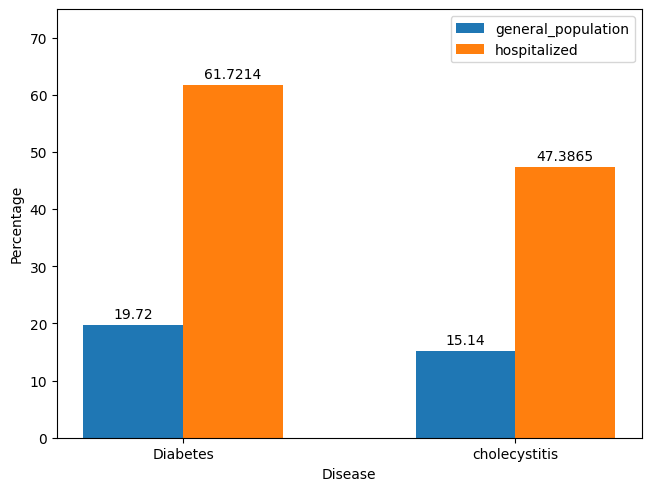

In [ ]:
# @title Step 3.a. Graphic illustration
c1 = general_population['diabetes'] == 1
c2 = general_population['cholecystitis'] == 1
freq1 = len(general_population[c1])*100/len(general_population)
freq2 = len(general_population[c2])*100/len(general_population)
d1 = (freq1, freq2)

c1 = hospitalized['diabetes'] == 1
c2 = hospitalized['cholecystitis'] == 1
freq1 = len(hospitalized[c1])*100/len(hospitalized)
freq2 = len(hospitalized[c2])*100/len(hospitalized)
d2 = (freq1, freq2)



labels = ("Diabetes", "cholecystitis")
data = {
    'general_population': d1,
    'hospitalized': d2,
}
x = np.arange(len(labels))
width = 0.3
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
ax.set_ylabel('Percentage')
ax.set_xlabel('Disease')
#ax.set_title('Repartition of general and hospitalized population by two diseases')
ax.set_xticks(x + 0.5*width, labels)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 75)
plt.savefig('berkson_plot.pdf', format='pdf')
plt.show()

From this figure we can see that in the general population, a few percentage have each of two diseases. these proportions differ by less than 5%.

Furthermore, of the total hospitalized population, almost 62% suffer from diabetes and 47% from cholecystitis, a difference of 15%.

From this analyse, there seems to be a link between the two diseases studied for the hospitalized population but for general population, the link seems to be weak. Let's quantify these relationships.

In [ ]:
# @title Step 3.b. Analyzing the relationship in both groups
correlation_population = general_population.corr().loc['diabetes', 'cholecystitis']
correlation_hospitalized = hospitalized.corr().loc['diabetes', 'cholecystitis']

print(f'Correlation in General Population: {correlation_population}')
print(f'Correlation in Hospitalized Patients: {correlation_hospitalized}')

Correlation in General Population: -0.005301468211527651
Correlation in Hospitalized Patients: -0.8298138752443566


In [ ]:
# @title Step 3.c. Inference on the relationship between these variables
datas = [general_population, hospitalized]
for i in range(len(datas)):
  if i==0:
    print("*****************  GENERAL POPULATION  ***********************")
  else:
    print("\n\n***************  HOSPITALIZED POPULATION  *****************")
  contingency_table = pd.crosstab(datas[i]['diabetes'], datas[i]['cholecystitis'])

  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print("Chi-statistic: "+str(chi2))
  print("degree of freedom: "+str(dof))
  print("p-value: "+str(p))
  n = contingency_table.sum().sum()
  v_cramer = (chi2 / n) ** 0.5
  print(f"Cramer's V: {v_cramer}")

*****************  GENERAL POPULATION  ***********************
Chi-statistic: 0.24511203926561934
degree of freedom: 1
p-value: 0.620538067110803
Cramer's V: 0.004950879106437758


***************  HOSPITALIZED POPULATION  *****************
Chi-statistic: 2196.6307117519104
degree of freedom: 1
p-value: 0.0
Cramer's V: 0.8291690717405675


According to Chi-square test, there is a significant link between the two disease only for the hospitalized population

### Understanding of Berkson's Paradox

* In the general population, the prevalence of both diabetes(20%) and cholecystitis(15%) might be lower and less strongly correlated. People with these conditions are spread across various settings, including those who might not have been diagnosed or are managing these conditions without hospitalization. Here, the association between diabetes and cholecystitis might be less apparent due to the diverse and unfiltered nature of the population.

* In contrast, studying the hospitalized population introduces a selection bias. Hospitalization often occurs due to more severe cases or complications of diseases. Therefore, individuals admitted to hospitals are more likely to have advanced or severe forms of diabetes or cholecystitis. This could potentially create a spurious association between these two diseases in hospital data that is not representative of the general population.

* From this exercise a learned sampling bias impact. In fact, Berkson's Paradox highlights the influence of sampling bias on observed associations between variables. When studying hospitalized populations, the selection criteria (hospital admission) can introduce a bias towards individuals with more severe or advanced forms of diseases.
* This paradox is important in medical research beacause, avoiding biases related to Berkson's Paradox in medical research involves careful study design, thoughtful consideration of sampling strategies, meticulous data analysis, and transparent reporting. Employing these strategies enhances the reliability of findings and supports more accurate conclusions in medical studies.
There is some technics to avoid  such issues:
 - Sampling Strategies: Ensure the inclusion of diverse samples representative of the entire population, not just hospitalized individuals. Random sampling or sampling from multiple settings (community-based, outpatient clinics, hospitals) helps reduce selection bias.

 - Adjustment for Confounders: Account for potential confounding variables that might influence the observed relationships between diseases. This helps in controlling biases and obtaining more accurate estimates.

 - Longitudinal Studies: Conduct longitudinal studies that track individuals' health statuses over time, providing a broader perspective on disease relationships and reducing biases related to specific settings or times of observation.

 - Meta-analysis and Systematic Reviews: Combine and analyze findings from multiple studies to obtain more comprehensive insights. This approach helps identify common patterns while minimizing biases associated with single studies.

 - Causal Inference Techniques: Utilize causal inference methods that consider causal relationships between variables rather than just associations. Techniques like causal modeling and randomized controlled trials (RCTs) can provide more robust evidence.

 - Transparent Reporting: Transparently report the study design, participant selection criteria, and limitations. Clear documentation helps readers assess the validity and generalizability of study findings.

 - Collaboration and Multidisciplinary Approaches: Collaborate across disciplines to ensure a comprehensive understanding of the studied phenomena. Combining medical expertise with statistical and epidemiological knowledge helps in designing better-controlled studies.

* These diseases can be caused by direct and indirect factors. Diabetes may have direct causal relationships with various metabolic factors, genetic predispositions, lifestyle choices, etc. Also, Cholecystitis may be caused by gallstone formation, dietary habits, and other factors. So,  just because diabetes and cholecystitis co-occur in hospitalized patients doesn't imply one causes the other, it might be due to shared risk factors or chance. Then, Causal thinking helps differentiate between correlations observed in data and actual causal relationships.

# Part 1: Modelling and 'applying' the Causal Inference Engine

In this part, we'll investigate the admissions process for the AIMS AI for Science 2023/2024 cohort. Our goal is to understand if the selection process is fair and represents a wide range of students from different African countries. We've noticed that there's a high number of students from only a few countries and a lack of representation from other major African countries. Let's start by modelling the key variables that might influence selection to the programme.

## Step 1: Defining the Problem
**Objective**: To explore whether the admissions process favours students from certain countries or backgrounds.

**Hypothesis**: The selection to the AIMS AI for Science programme is influenced by factors like location, gender, and educational background.

## Step 2: Identifying Key Variables

We have considered 7 variables in our analyze: `location`, `gender`, `mathematics_ability`, `coding_ability`, `prior_education`, `english_ability` and `recommandation_letter`. And also the explained variable `selection`


## Step 3: Building the Causal Model

First, let's import the necessary libraries and set up a basic structure for our analysis.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import networkx as n
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

Now, let's build a causal model using the variables we've identified. We use NetworkX to create a graphical representation of the model.

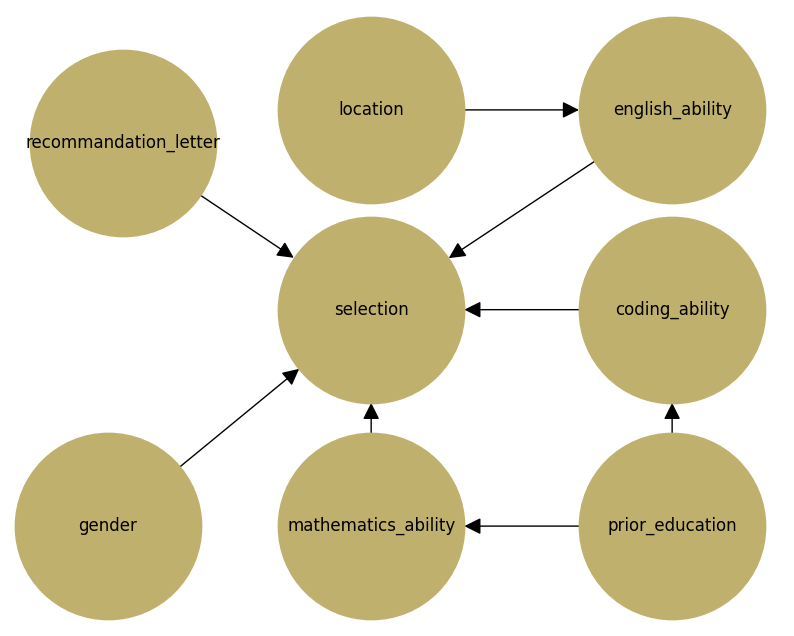

In [ ]:
# Setting up the plotting
%matplotlib inline
sns.set_style('whitegrid')

# Placeholder for data loading (to be completed by students)
locations_modalities = ['Cameroon', 'Madagascar', 'Chad', 'Benin', ]

# Placeholder for causal graph creation (to be completed by students)
causal_graph = nx.DiGraph()
# Add nodes and edges to represent the causal relationships
causal_graph.add_edges_from([
    ('gender', 'selection'),
    ('mathematics_ability', 'selection'),
    ('coding_ability','selection'),
    ('english_ability','selection'),
    ('recommandation_letter','selection'),
    ('prior_education', 'mathematics_ability'),
    ('prior_education', 'coding_ability'),
    ('location', 'english_ability'),
    #('mathematics_ability', 'coding_ability'),
])

node_positions = {
    'location': (0, 1.2),
    'gender': (-3.5, -1.3),
    'mathematics_ability': (0, -1.3),
    'prior_education': (4, -1.3),
    'coding_ability': (4, 0),
    'english_ability': (4, 1.2),
    'recommandation_letter': (-3.3, 1),
    'selection': (0, 0)

}
plt.figure(figsize=(10, 8))
plt.xlim(-4.8,5.5)
plt.ylim(-1.9,1.8)
nx.draw(causal_graph, pos=node_positions, with_labels=True, node_size=18000, node_color='#BFB16D', edge_color='black', node_shape='o', arrowsize=25)
plt.savefig('graph.pdf', format='pdf', bbox_inches='tight')
plt.show()


In this DAG we assume that the selection is directly caused by the factors as:
* gender: Evaluators may have unconscious biases favoring one gender over the other when assessing performance, thus affecting the results. Also, differences in access to education, teachers' or parents' expectations of students based on their gender, and stereotypes about cognitive abilities can influence academic performance, and therefore influence their selection.
* mathematics and coding abilities: This is because there is a math and coding test in the student recruitment process. So the candidates need to be smart in maths and/or in mathematics for be selected.
* english ability: this ability allow candidates to write well the mathematics questions of the test and also write a nice motivational letter.
* recommandation letter: it can add credibility to a candidate's application by providing external testimonials on his or her skills, personal and professional qualities. It can support the application by providing details of past performance, achievements or specific qualities that may be relevant to selection. In addition, in a competitive candidate pools, a strong letter of recommendation can help set a candidate apart from the rest by highlighting his or her assets, unique qualities or exceptional experience.

Some of these variables can also be caused by others factors:
- english ability: it's common in all african countries to have a very diverse local languages. Some of them have english as official languages and others not. So, the fact of coming from a country with english as official language or work language can improve the english ability of this candidate.
- mathematics ability: The complexity of mathematical concepts can vary according to the field of study. For example, the mathematics used in theoretical physics may differ from that used in economics. Students with a background in mathematics are obviously better suited than those with a background in engineering or computer science. Then, the prior education can cause mathematics ability.
- coding ability: Mathematics often involves solving complex problems, which encourages the development of logical thinking and an analytical approach. These skills are also essential in programming, to break down problems into logical steps. That's why mathematics ability can cause coding ability. But because of backdoor criterion, the causality link have been removed in the graph

## Implementing the Model in Pyro and Generating Data

After building the causal graph, the next step is to bring the model to life using Pyro. We'll define the relationships and dependencies between variables in a probabilistic framework and then generate synthetic data based on this model.

First, we need to import Pyro and set up the basic environment for probabilistic programming.

In [ ]:
!pip install pyro-ppl
!pip install causal-learn
!pip install cdt

import pyro
import pyro.distributions as dist
import torch
import requests
from causallearn.search.ScoreBased.GES import ges

#### Variables characteristics

In this table, we define the nature of variables and also their distributions
<table>
    <thead>
        <tr>
            <th>Variable</th>
            <th>Nature</th>
            <th>Distribution</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>selection</td>
            <td>Binary</td>
            <td>Bernoulli distribution</td>
        </tr>
        <tr>
            <td>location</td>
            <td>Categorical</td>
            <td>Categorical distribution</td>
        </tr>
        <tr>
            <td>prior_education</td>
            <td>Categorical</td>
            <td>Categorical distribution</td>
        </tr>
        <tr>
            <td>gender</td>
            <td>Bernoulli</td>
            <td>Bernoulli distribution</td>
        </tr>
        <tr>
            <td>english_ability</td>
            <td>Numerical</td>
            <td>Normal distribution</td>
        </tr>
        <tr>
            <td>mathematics_ability</td>
            <td>Numerical</td>
            <td>Normal distribution</td>
        </tr>
        <tr>
            <td>coding_ability</td>
            <td>Numerical</td>
            <td>Normal distribution</td>
        </tr>
        <tr>
            <td>recommandation_letter</td>
            <td>Bernoulli</td>
            <td>Bernoulli distribution</td>
        </tr>
    </tbody>
</table>

The assumptions about variables's distributions are:
* location: this variable follows a categorical distribution because there is 59 countries in Africa. And the fact for a candidate to be from a specific kind of country can affect his/her willingness to apply. For example, the candidates from English-speaking countries may receive application information more quickly because of the language, and will also feel free to apply. This is not the case in French-speaking countries, because of the stress and difficulties of understanding or expressing themselves in English. Also, we assume that the south african candidates and the candidates for neighboring countries of South Africa are more motivated to apply than others. So, if $p$ is the probability of a candidate from a non neighboring of South Africa and not an english-speaker. The probability of a candidate from english-speaking country is $2p$. And the probability for a candidate of neighboring of South Africa and english-speaker is $3p$ and $2p$ otherwise.
* prior education: We assume that there is 5 possible background to apply because of the elligibility criterions: 'Computer Science', 'Physics', 'Engineering', 'Statistics', 'Mathematics'. And each of them have a same chance to apply.
* gender: We assume that the male candidates are 1.5 more motivated to apply than female candidates.
* english ability: We assume that this variable is gaussian with 0.02 as standard deviation
* mathematics ability and coding ability: are all gaussians with 0.2 as standard deviation
* recommandation letter: We assume that the chance for a candidate to have a recommandation is 0.3 due to the difficulties of having recommandation.

In [ ]:
# @title Get the countries data
url_countries = "https://restcountries.com/v3.1/all"

# Send GET request to fetch country data
response = requests.get(url_countries)

if response.status_code == 200:
    # Parse JSON response
    countries_data = response.json()
    print("Succeeded to retrieve countries data")
    # Filter countries that are in Africa
    african_countries = [country['name']['common'] for country in countries_data
                        if 'Africa' in country['region']]
    # Filter country that have english as official language and neighbors countries
    neighbors = ['Namibia', 'Botswana', 'Zimbabwe', 'Madagascar', 'South Africa', 'Lesotho', 'Eswatini', 'Mozambique']
    is_neighbor = []
    is_english_speakers = []
    for country in countries_data:
      if 'Africa' in country['region']:
        if 'eng' in country['languages'].keys():
          is_english_speakers.append(1)
        else:
          is_english_speakers.append(0)
        if country['name']['common'] in neighbors:
          is_neighbor.append(1)
        else:
          is_neighbor.append(0)
else:
    print("Failed to retrieve data. Status code:", response.status_code)

Succeeded to retrieve countries data


In [ ]:
# @title Data structure
class Data:
  def __init__(self, countries, is_english_speakers, is_neighbor):
    self.countries = countries
    self.is_english_speakers = is_english_speakers
    self.is_neighbor = is_neighbor
    self.labels_data = None
    self.data = []

  def get_data(self):
    return self.data

  def get_labels_data(self):
    return self.labels_data

  def generate_data(self, num_samples):
    for _ in range(num_samples):
      # Example: Define a normal distribution for mathematics_ability
      locations_prob = np.array([1]*len(self.countries))
      locations_prob += np.array(self.is_english_speakers) + np.array(self.is_neighbor)
      locations_prob = locations_prob/sum(locations_prob)
      locations_prob = torch.tensor(locations_prob.tolist())
      location  = pyro.sample('location', dist.Categorical(locations_prob))
      location_categories = self.countries

      prior_education_categories = ['Computer Science', 'Physics', 'Engineering', 'Statistics', 'Mathematics']
      prior_education_probs = torch.tensor([1.0/len(prior_education_categories)]*len(prior_education_categories))
      prior_education = pyro.sample('prior_education', dist.Categorical(prior_education_probs))

      gender = pyro.sample('gender', dist.Bernoulli(0.6))
      gender_categories = ['Female', 'Male']

      english_ability = pyro.sample('english_ability', dist.Normal(2*locations_prob[location], 0.02))

      mathematics_ability = pyro.sample('mathematics_ability', dist.Normal(prior_education/8, 0.2))
      coding_ability = pyro.sample('coding_ability', dist.Normal(6-prior_education.item(), 0.2))

      recommandation_letter = pyro.sample('recommandation_letter', dist.Bernoulli(0.3))
      recommandation_letter_categories = ['No', 'Yes']
      p = torch.sigmoid(english_ability + 3*mathematics_ability + 2*coding_ability + 0.2*gender + 0.1*recommandation_letter -6)
      selection = pyro.sample('selection',dist.Bernoulli(p))
      selection_categories = ['Not Selected', 'Selected']

      self.data.append({
          'selection': selection.item(),
          'mathematics_ability': mathematics_ability.item(),
          'coding_ability': coding_ability.item(),
          'location': location.item(),
          'prior_education': prior_education.item(),
          'gender': gender.item(),
          'english_ability': english_ability.item(),
          'recommandation_letter': recommandation_letter.item(),
          # Include other variables here
      })
    self.data = pd.DataFrame(self.data)
    self.labels_data = {
          'location': location_categories,
          'prior_education': prior_education_categories,
          'gender': gender_categories,
          'recommandation_letter': recommandation_letter_categories,
          'selection': selection_categories,
    }

## Structural Causal Model (SCM)

Let's call $y$:=`selection`;  $mat$ := `mathematics_ability`; $cod$ := `coding_ability`; $loc$ := `location`; $prior$ := `prior_education`;
$gen$ := `gender`; $eng$ := `english_ability`; $rec$ := `recommandation_letter`

From then on, the Structural Causal Model (SCM) is the following:
$$
\left\{
\begin{array}{rl}
	loc = & Cat(k_{loc},p_{loc})\\
	prior = & Cat(k_{prior},p_{prior})\\
	gen = & \mathcal{B}er(p_{gen})\\
	rec = & \mathcal{B}er(p_{rec})\\
	eng = & p_{loc} + \mathcal{N}(0, \sigma_{eng})\\
	mat = &  prior/8 + \mathcal{N}(0, \sigma_{mat})\\
	cod = &  - prior+ \mathcal{N}(6, \sigma_{cod})\\
	y = & \mathcal{B}er(z(eng + 3mat + 2cod + 0.2gen + 0.1rec))
\end{array}
\right.
$$
Where z is the sigmoïd function defined by $z(x):=\frac{1}{1+e^{-x}}$

The joint distribution can be expressed as following:\\[3mm]
$$
	P(y, loc, rec, gen, mat, prior, cod, en) = P(y|gen, rec, mat, cod, en) \times P(en|loc)  \times P(cod|mat, prior) \times P(mat| prior)
$$

### Analyzing of the model:

All the backdoor paths have been closed in the graph. So, the Backdoor criterion is satisfied to estimate the causal effect of any variable on another. ✅

In [ ]:
# @title Generate the data
pyro.set_rng_seed(101)
np.random.seed(42)
data = Data(countries=african_countries, is_english_speakers=is_english_speakers, is_neighbor=is_neighbor)
data.generate_data(1000)
synthetic_data = data.get_data()
synthetic_data.head()

,selection,mathematics_ability,coding_ability,location,prior_education,gender,english_ability,recommandation_letter
0,0.0,0.565300,1.937192,30,4,1.0,0.052761,1.0
1,1.0,0.010445,4.359543,46,1,1.0,0.004386,0.0
2,1.0,0.598053,4.121222,11,2,1.0,0.072382,0.0
3,0.0,0.480763,1.762791,0,4,1.0,0.060289,0.0
4,1.0,0.553917,2.172269,55,4,1.0,0.044615,1.0



## Reflect and Discuss

With the synthetic dataset in hand:

- How the generated data aligns with the expectations based on the model ?
- What insights or surprises did we find in the data ?

To answers these questions, let's get the labelled data first.

In [ ]:
# @title Get the labelled data
all_labels = data.get_labels_data()
labelled_data = {}
for column in synthetic_data:
  #labelled_data[column] = synthetic_data[column].to_numpy()[y].tolist()
  if column in all_labels.keys():
    x = []
    for el2 in synthetic_data[column]:
      x.append(all_labels[column][int(el2)])
    labelled_data[column] = x
  else:
    labelled_data[column] = synthetic_data[column]
labelled_data = pd.DataFrame(labelled_data)
labelled_data.head()

,selection,mathematics_ability,coding_ability,location,prior_education,gender,english_ability,recommandation_letter
0,Not Selected,0.565300,1.937192,Cameroon,Mathematics,Male,0.052761,Yes
1,Selected,0.010445,4.359543,Malawi,Physics,Male,0.004386,No
2,Selected,0.598053,4.121222,Botswana,Engineering,Male,0.072382,No
3,Not Selected,0.480763,1.762791,Eritrea,Mathematics,Male,0.060289,No
4,Selected,0.553917,2.172269,Tunisia,Mathematics,Male,0.044615,Yes


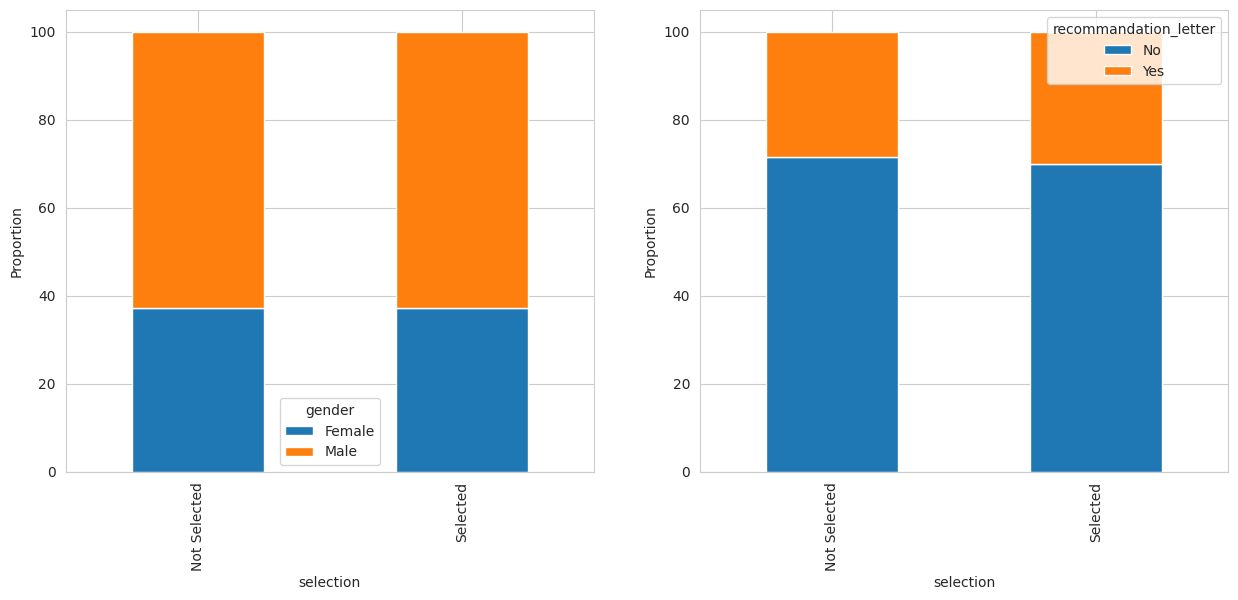

In [ ]:
# @title Some descriptive statistics on the generated data set
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
labels_to_plot = ['gender', 'recommandation_letter']
for index in range(len(labels_to_plot)):
  cross_tab = pd.crosstab(index=labelled_data['selection'],
                                  columns=labelled_data[labels_to_plot[index]])
  for i in range(2):
    t = cross_tab.iloc[i,:].to_numpy()
    t = t*100/t.sum()
    cross_tab.iloc[i,:] = t.tolist()
  cross_tab.plot(kind='bar', stacked=True, ax=axes[index % 2])
  axes[index % 2].set_ylabel('Proportion')
plt.show()

From this figure we can see that the link between selection variable and each of variables gender and recommandation_letter are weak in the generated data.

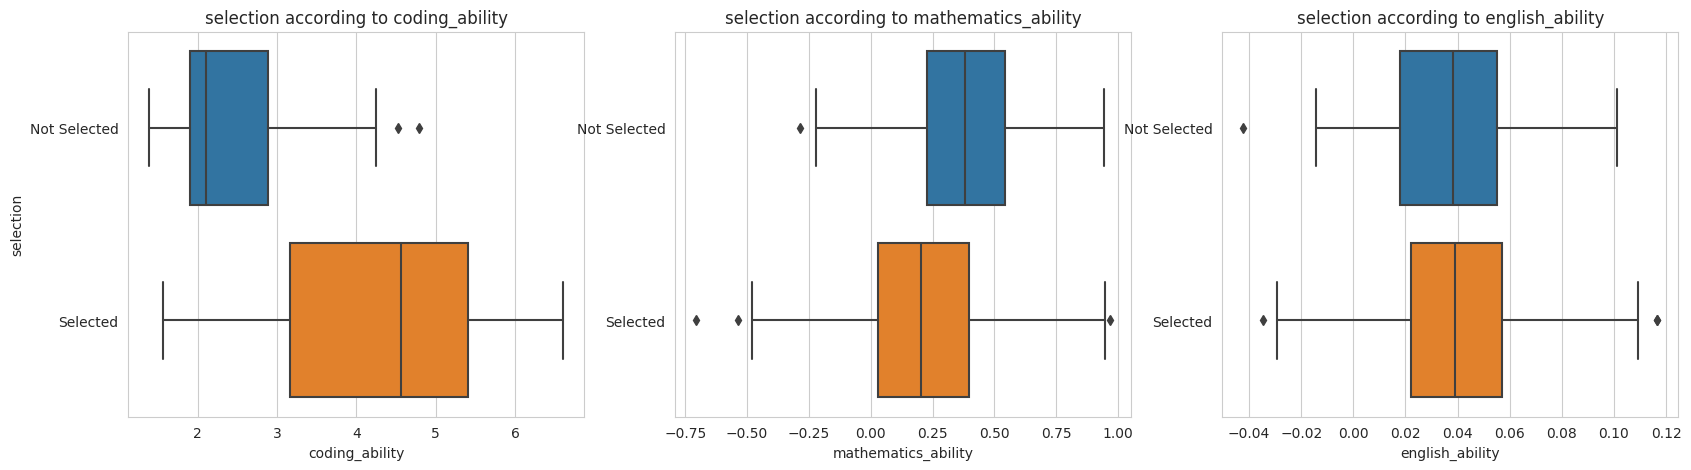

In [ ]:
# @title Some descriptive statistics on the generated data set
labels_to_plot = ['coding_ability', 'mathematics_ability', 'english_ability']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for index in range(len(labels_to_plot)):
  d = labelled_data.loc[:, ['selection', labels_to_plot[index]]]
  sns.boxplot(x=labels_to_plot[index], y='selection', data=labelled_data, ax=axes[index % 3])
  axes[index % 3].set_title("selection according to "+labels_to_plot[index])
  if index != 0:
    axes[index % 3].set_ylabel("")
plt.show()

From this figure, we see easily that more a candidate have coding more he/she have a chance to be selected. It's a reversed case for mathematics ability. ANd english ability doesn't really matter here.

# Part 2: Causal Discovery Using Greedy Equivalence Search (GES)

In this section, we shift our approach from using domain knowledge to discover causal relationships in data. We'll use the Greedy Equivalence Search (GES) algorithm to learn a causal graph from the data you generated in Part 1. The key here is to assume we don't know the true causal structure.

### Evaluation of a GES

The Structural Hamming Distance (SHD) is an indicator that evaluates the difference between two graphs by counting the number of edges or edge orientations that need to be added, removed or modified to transform one DAG into another. Here, the value of SHD is 14. So there is 14 nodes to add, remove or modify in the learned graph to have the initial graph.

### Critical analysis of using learning graphs

The risk is learned graphs might capture correlations instead of true causal relationships, especially in observational data, leading to mistaken causal inferences.

Correlation doesn't always imply causation. Without experimental data or domain knowledge, inferring causality solely from observational data can be misleading.

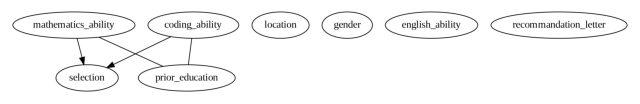

In [ ]:
# @title Causal Graph inference
model = ges(synthetic_data.to_numpy())

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io

pyd = GraphUtils.to_pydot(model['G'], labels=synthetic_data.keys().tolist())
tmp_png = pyd.create_png(f='png')
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img)
plt.show()

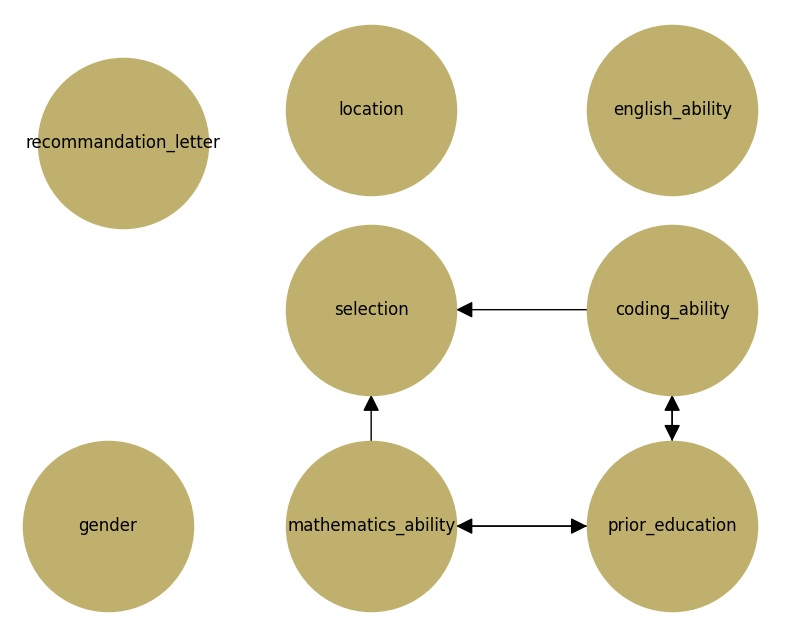

In [ ]:
# @title Displaying of the same way the learned graph
# Setting up the plotting
%matplotlib inline
sns.set_style('whitegrid')


learned_graph = nx.DiGraph()

learned_graph.add_edges_from([
    #('gender', 'selection'),
    ('mathematics_ability', 'selection'),
    ('coding_ability','selection'),
    #('english_ability','selection'),
    #('recommandation_letter','selection'),
    ('prior_education', 'mathematics_ability'),
    ('mathematics_ability', 'prior_education'),
    ('prior_education', 'coding_ability'),
    ('coding_ability', 'prior_education'),
    #('location', 'english_ability'),
    #('mathematics_ability', 'coding_ability'),
])


plt.figure(figsize=(10, 8))
plt.xlim(-4.8,5.5)
plt.ylim(-1.9,1.8)
nx.draw_networkx_edges(learned_graph, node_positions, node_size=15000,arrowsize=25)
nx.draw_networkx_labels(causal_graph, pos=node_positions, font_color='black')

nx.draw_networkx_nodes(learned_graph, pos=node_positions, nodelist=list(causal_graph.nodes()), node_size=15000, node_color='#BFB16D', node_shape='o', label=True)

plt.grid(False)
plt.axis('off')

plt.savefig('learned_graph.pdf', format='pdf', bbox_inches='tight')
plt.show()


The starting graph and the trained graph have some differences in terms of causal relationships.  In fact, the model has rejected certain causes of the `selection` variable:`gender`, `english_ability` and `recommandation_letter`.
Also, the causal relationship between `location` and `english_ability` has been removed.

In [ ]:
from cdt.metrics import SHD

# Compute SHD
shd_value = SHD(causal_graph,  model['G'].graph)
print("Structural Hamming Distance:", shd_value)

Structural Hamming Distance: 14


No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
